In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from util.general import load_csv_pandas

In [3]:
data_df = load_csv_pandas('원천조사가격정보_201601.csv')
#print(type(data_df))
#indexNames = data_df[data_df['조사구분명']=='도매가격'].index
data_df=data_df[data_df['조사구분명']=='소비자가격']
data_df = data_df[['조사일자', '조사가격품목명','표준품종명','조사가격품종명','표준품목명','조사지역명','조사단위명','당일조사가격']]

In [14]:
data_df.head()

,조사일자,조사가격품목명,표준품종명,조사가격품종명,표준품목명,조사지역명,조사단위명,당일조사가격,price_unit,averge_price
28,2016-01-04,쌀,일반계,일반계,벼,서울서부,20KG,43300,200,216.5
29,2016-01-04,쌀,일반계,일반계,벼,서울서부,20KG,44300,200,221.5
30,2016-01-04,쌀,일반계,일반계,벼,서울서부,20KG,37000,200,185.0
33,2016-01-04,쌀,일반계,일반계,벼,서울,20KG,44500,200,222.5
34,2016-01-04,쌀,일반계,일반계,벼,서울,20KG,44800,200,224.0


In [5]:
# 조건식 추가

cond1 = data_df['조사단위명']=='20KG'
cond2 = data_df['조사단위명']=='1.2KG'
cond3 = data_df['조사단위명']=='8KG'
cond4 = data_df[(data_df['조사단위명']=='1KG') |(data_df['조사단위명']=='1KG(단)')| (data_df['조사단위명']=='1KG(1단)') | (data_df['조사단위명']=='10개') | (data_df['조사단위명']=='10마리') | (data_df['조사단위명']=='1L')]
cond5 = data_df[(data_df['조사단위명']=='100G') | (data_df['조사단위명']=='1개') | (data_df['조사단위명']=='1마리') |(data_df['조사단위명']=='1속')| (data_df['조사단위명']=='1포기')]
cond6 = data_df[(data_df['조사단위명']=='200G') | (data_df['조사단위명']=='2마리')]
cond7 = data_df['조사단위명']=='500G'
cond8 = data_df['조사단위명']=='600G'

def unit_fit(unit_name):
    unit=0
    if unit_name=='20KG' : unit= 200
    elif unit_name=='1.2KG' : unit= 12
    elif unit_name=='8KG' : unit= 80
    elif unit_name=='1KG' : unit=10
    elif unit_name=='1KG(단)' : unit=10
    elif unit_name=='1KG(1단)': unit=10
    elif unit_name=='10개': unit=10
    elif unit_name=='10마리': unit=10
    elif unit_name=='1L' : unit=10 
    elif unit_name=='100G': unit= 1
    elif unit_name=='1개' : unit= 1
    elif unit_name=='1마리' : unit= 1
    elif unit_name=='1속' : unit= 1
    elif unit_name=='1포기' : unit= 1
    elif unit_name=='200G' :unit=2
    elif unit_name=='2마리' : unit= 2
    elif unit_name=='500G' : unit= 5
    else  : unit= 6
    
    return unit



In [6]:
data_df['price_unit']= data_df['조사단위명'].apply(lambda x : unit_fit(x))

In [7]:
data_df['averge_price']= data_df['당일조사가격']/data_df['price_unit']
tmp_df = data_df.drop(['조사단위명', '당일조사가격', 'price_unit'], axis=1)
tmp_df.head()


,조사일자,조사가격품목명,표준품종명,조사가격품종명,표준품목명,조사지역명,averge_price
28,2016-01-04,쌀,일반계,일반계,벼,서울서부,216.5
29,2016-01-04,쌀,일반계,일반계,벼,서울서부,221.5
30,2016-01-04,쌀,일반계,일반계,벼,서울서부,185.0
33,2016-01-04,쌀,일반계,일반계,벼,서울,222.5
34,2016-01-04,쌀,일반계,일반계,벼,서울,224.0


In [15]:
region_df = tmp_df.groupby(['조사일자', '조사지역명', '표준품목명', '조사가격품목명', '표준품종명', '조사가격품종명']).mean()
region_df.head(20)
# region_df.reset_index(inplace=True)

tmptmp_df = tmp_df[(tmp_df.표준품목명=='감자')] # & (tmp_df.조사지역명=='서울서부')]
tmptmptmp_df= tmptmp_df.groupby(['조사일자', '조사지역명', '표준품목명', '조사가격품목명', '표준품종명', '조사가격품종명']).mean()
tmptmptmp_df

averge_price
조사일자       조사지역명 표준품목명 조사가격품목명 표준품종명 조사가격품종명              
2016-01-04 강원    감자    감자      수미    수미          27.800000
           강원춘천  감자    감자      수미    수미          22.500000
           경기    감자    감자      수미    수미          18.000000
           경남창원  감자    감자      수미    수미          22.500000
           경북포항  감자    감자      수미    수미          22.000000
...                                                    ...
2016-01-29 대전    감자    감자      수미    수미          22.500000
           부산    감자    감자      수미    수미          20.666667
           서울    감자    감자      수미    수미          22.633333
           인천    감자    감자      수미    수미          19.800000
           제주    감자    감자      수미    수미          34.000000

[215 rows x 1 columns]

In [9]:
import matplotlib.pyplot as plt

TypeError: no numeric data to plot

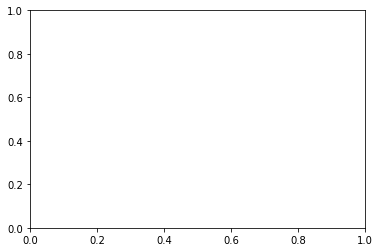

In [10]:
tmptmptmp_df.reset_index(inplace=True)
tmptmptmp_df.plot(kind='line', x='조사일자', y='averge_price', ax=plt.gca())